In [ ]:
##https://data.telangana.gov.in/dataset/adilabad-district-mandal-wise-crop-areas

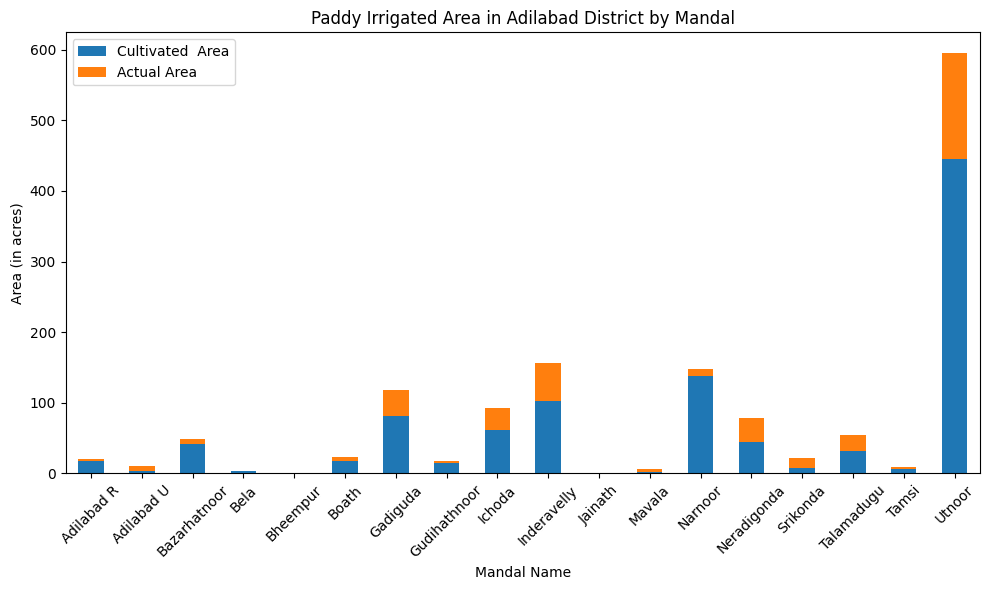

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('adilabad_kharif_2018-19_0.csv')
adilabad_data = data[(data['district_name'] == 'Adilabad') & (data['crop'] == 'Paddy Irrigated')]
mandal_data = adilabad_data.groupby('mandal_name')[['normal_area', 'actual_area']].sum()
mandal_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Paddy Irrigated Area in Adilabad District by Mandal')
plt.xlabel('Mandal Name')
plt.ylabel('Area (in acres)')
plt.legend(['Cultivated  Area', 'Actual Area'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


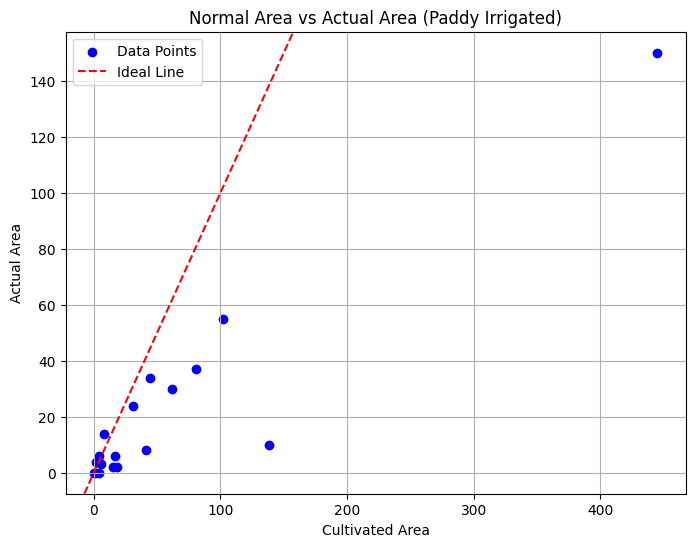

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('adilabad_kharif_2018-19_0.csv')

adilabad_data = data[(data['district_name'] == 'Adilabad') & (data['crop'] == 'Paddy Irrigated')]

plt.figure(figsize=(8, 6))
plt.scatter(adilabad_data['normal_area'], adilabad_data['actual_area'], color='blue', label='Data Points')
plt.xlabel('Cultivated Area')
plt.ylabel('Actual Area')
plt.title('Normal Area vs Actual Area (Paddy Irrigated)')
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Ideal Line')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
pip install opencv-python scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\kamir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


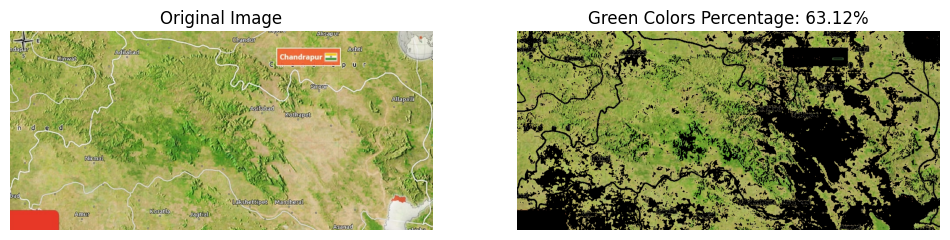

In [20]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# Load the image
image = cv2.imread('adilabad.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to be a list of pixels
pixels = image.reshape((-1, 3))

# Define a function to extract green and light green colors using K-means clustering
def extract_green_colors(image, n_colors=2):
    kmeans = KMeans(n_clusters=n_colors)
    kmeans.fit(image)
    dominant_colors = kmeans.cluster_centers_
    return dominant_colors

# Extract dominant green and light green colors
green_colors = extract_green_colors(pixels)

# Define a function to mask the image to show only green and light green colors
def mask_green_colors(image, colors, tolerance=50):
    lower_bound = np.array([color - tolerance for color in colors])
    upper_bound = np.array([color + tolerance for color in colors])
    mask = cv2.inRange(image, lower_bound, upper_bound)
    masked_pixels = np.count_nonzero(mask)
    total_pixels = mask.size
    green_percentage = (masked_pixels / total_pixels) * 100
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image, green_percentage

# Mask the image to show only green and light green colors and calculate their percentage
masked_image, green_percentage = mask_green_colors(image, green_colors[0])

# Display the original and masked images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title(f'Green Colors Percentage: {green_percentage:.2f}%')
plt.axis('off')

plt.show()
